In [83]:
import numpy as np
import pandas as pd
import xarray as xr
import glob, os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime, date, time, timedelta
import time
import gsw
import scipy.stats as stats
import matplotlib.dates as mdates
import math

In [38]:
argo_interp = xr.open_dataset("/Users/znachod/DataspellProjects/float_bgc_synthesis_products/data/argo_interp_temp.nc")


In [42]:
argo_wmo = argo_interp.groupby('wmo')

DatasetGroupBy, grouped over 'wmo'
1543 groups with labels 1900722, 1900943, ..., 7901007.

In [239]:
for wmo, group in argo_wmo:
    if wmo == 5906497:
        print("found")

found


float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float not found
float no

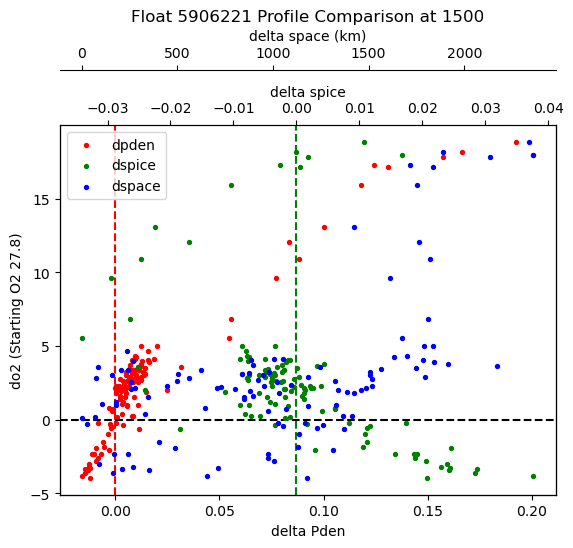

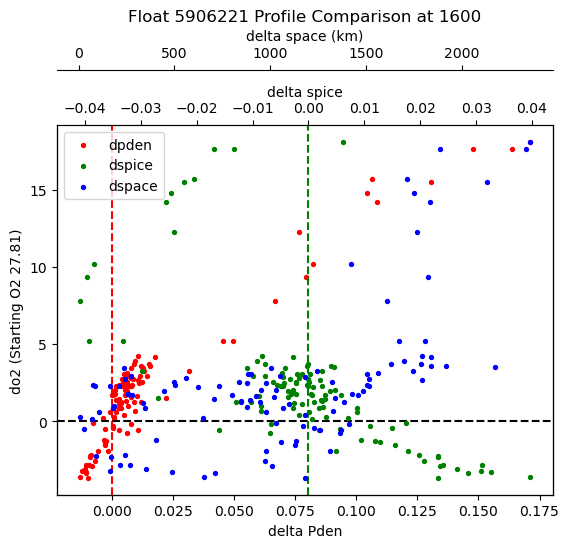

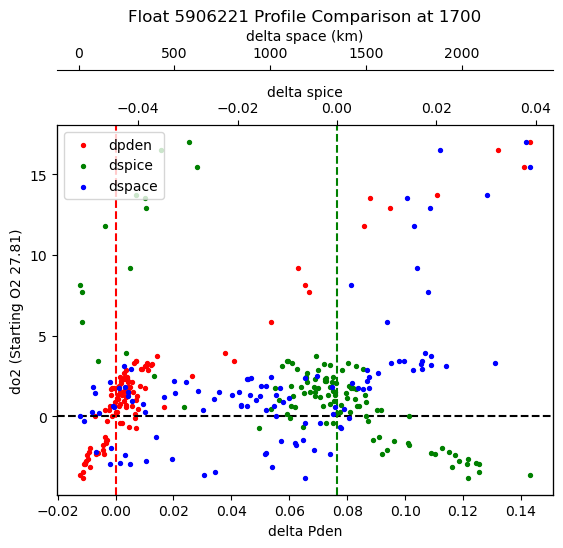

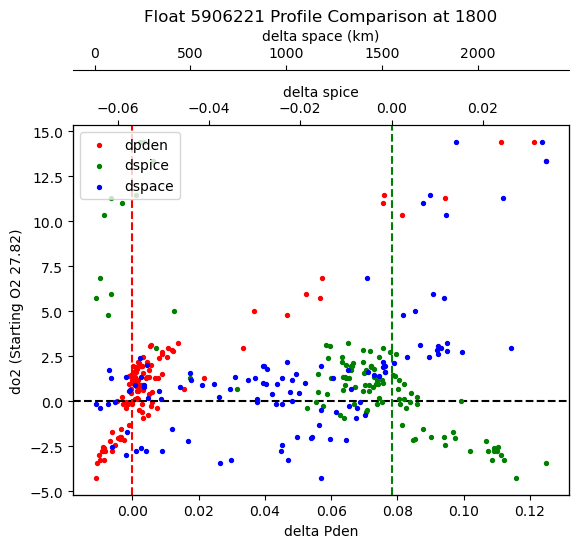

41
Missing Profile 13
49
Missing Profile 5


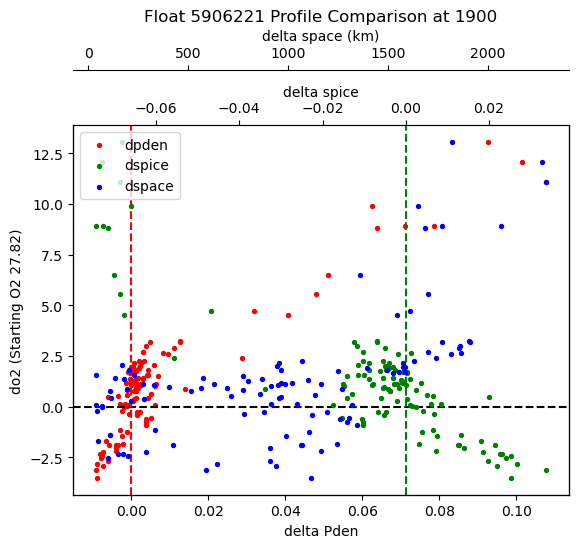

KeyError: 11

In [246]:
for wmo, group in argo_wmo:
    select_float = 5906221
    selected_pres = [1500, 1600, 1700, 1800, 1900, 2000]
    if wmo == select_float:
        for pres in selected_pres:
            pres_select = group.where(group.PRES_ADJUSTED == pres)
            float_profiles = pres_select.groupby('profile')
            num_prof = len(float_profiles)
            start_prof = math.ceil(num_prof/2)

            dprofile = []
            do2 = []
            ddens = []
            dspice = []
            dspace = []
            prof_diff = 1
            for i in range(1, start_prof):
                starting_profile = float_profiles[start_prof]
                dprofile.append(prof_diff)
                dprofile.append(prof_diff)
                try:
                    previous_profile = float_profiles[start_prof - prof_diff]
                    ddens.append(starting_profile.PDENS.values[0] - previous_profile.PDENS.values[0])
                    do2.append(starting_profile.DOXY_ADJUSTED.values[0] - previous_profile.DOXY_ADJUSTED.values[0])
                    dspice.append(starting_profile.spice.values[0] - previous_profile.spice.values[0])
                    lats = [starting_profile.LATITUDE.values[0], previous_profile.LATITUDE.values[0]]
                    lons = [starting_profile.LONGITUDE.values[0], previous_profile.LONGITUDE.values[0]]
                    dspace.append(gsw.distance(lats, lons)[0]/1000)
                except KeyError:
                    print(prof_diff)
                    print("Missing Profile " + str((start_prof - prof_diff) - 1))
                    pass
                try:
                    after_profile = float_profiles[start_prof + prof_diff]
                    ddens.append(starting_profile.PDENS.values[0] - after_profile.PDENS.values[0])
                    do2.append(starting_profile.DOXY_ADJUSTED.values[0] - after_profile.DOXY_ADJUSTED.values[0])
                    dspice.append(starting_profile.spice.values[0] - after_profile.spice.values[0])
                    lats = [starting_profile.LATITUDE.values[0], after_profile.LATITUDE.values[0]]
                    lons = [starting_profile.LONGITUDE.values[0], after_profile.LONGITUDE.values[0]]
                    dspace.append(gsw.distance(lats, lons)[0]/1000)
                except KeyError:
                    print("Missing Profile " + str((start_prof + prof_diff) - 1))
                    pass
                prof_diff = prof_diff + 1
            # for profile, data in float_profiles:
            #     print(data)
            fig, ax1 = plt.subplots()
            ax1.scatter(ddens, do2, c="r", label="dpden", s = 8)
            ax1.set_xlabel('delta Pden')
            ax1.set_ylabel("do2 (Starting O2 " + str(round(starting_profile.PDENS.values[0], 2)) + ")")
            # ax1.set_xlim(-0.05, 0.05)
            ax1.axhline(y=0, c="black", linestyle = "--")
            ax1.axvline(x=0, c="r", linestyle = "--")

            ax2 = ax1.twiny()
            ax2.scatter(dspice, do2, c="g", label="dspice", s = 8)
            ax2.set_xlabel("delta spice")
            ax2.axvline(x=0, c="g", linestyle = "--")
            # ax2.set_xlim(-0.05, 0.05)

            ax3 = ax1.twiny()
            ax3.scatter(dspace, do2, c="b", label="dspace", s = 8)
            ax3.set_xlabel("delta space (km)")
            ax3.spines.top.set_position(("axes", 1.15))
            lines, labels = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            lines3, labels3 = ax3.get_legend_handles_labels()
            ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=0)
            plt.title("Float " + str(wmo) + " Profile Comparison at " + str(pres))
            fig.savefig("/Users/znachod/Downloads/"+str(wmo)+"_"+str(pres)+".png", bbox_inches='tight')
            plt.show()
    else:
        print("float not found")

In [88]:
5906221590622659062265906497math.ceil(num_prof/2) + 66

133